In [145]:
import pandas as pd
side = pd.read_excel("/kaggle/input/side-effect-data-1-xlsx/side_effect_data 1.xlsx")
df = side.copy()
df.head()

import warnings
warnings.filterwarnings("ignore")

In [146]:
df.tail()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
2352,9,NaN,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,Ispanakgiller,NaN,,"Astim, Guatr",,"KOAH, Kan Hastaliklari",NaN,50.0,152.0
2353,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Istiridye,NaN,"Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,NaN,178.0
2354,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger",NaN,"Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.0,203.0
2355,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,Sari Kantaron,"Alzheimer, Diger",NaN,"Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",NaN,90.0,184.0
2356,174,Female,1986-11-07,Turkiye,Istanbul,valproic acid,2022-01-06,2022-03-06,Istah Artisi,2022-02-17 07:08:01,NaN,"Alzheimer, Diger","Kanser, Diger","Hipertansiyon, Kan Hastaliklari",,"Hipertansiyon, Diger",AB RH+,79.0,175.0


In [147]:
#veri seti yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [148]:
df.shape

(2357, 19)

In [149]:
df.columns

Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')

In [150]:
df.describe().T
df.describe().T #eksik gözlemleri gözardı eder ve kategorik değişkenleri dışarıda bırakır.

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
Boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


In [151]:
#hiç eksik gözlem(değer) var mı?
df.isnull().values.any()

True

In [152]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Eksik Gözlem Sayısı': missing_values, 'Eksik Gözlem Oranı (%)': missing_percentage})

print(missing_data)


                                  Eksik Gözlem Sayısı  Eksik Gözlem Oranı (%)
Kullanici_id                                        0                0.000000
Cinsiyet                                          778               33.008061
Dogum_Tarihi                                        0                0.000000
Uyruk                                               0                0.000000
Il                                                227                9.630887
Ilac_Adi                                            0                0.000000
Ilac_Baslangic_Tarihi                               0                0.000000
Ilac_Bitis_Tarihi                                   0                0.000000
Yan_Etki                                            0                0.000000
Yan_Etki_Bildirim_Tarihi                            0                0.000000
Alerjilerim                                       484               20.534578
Kronik Hastaliklarim                              392           

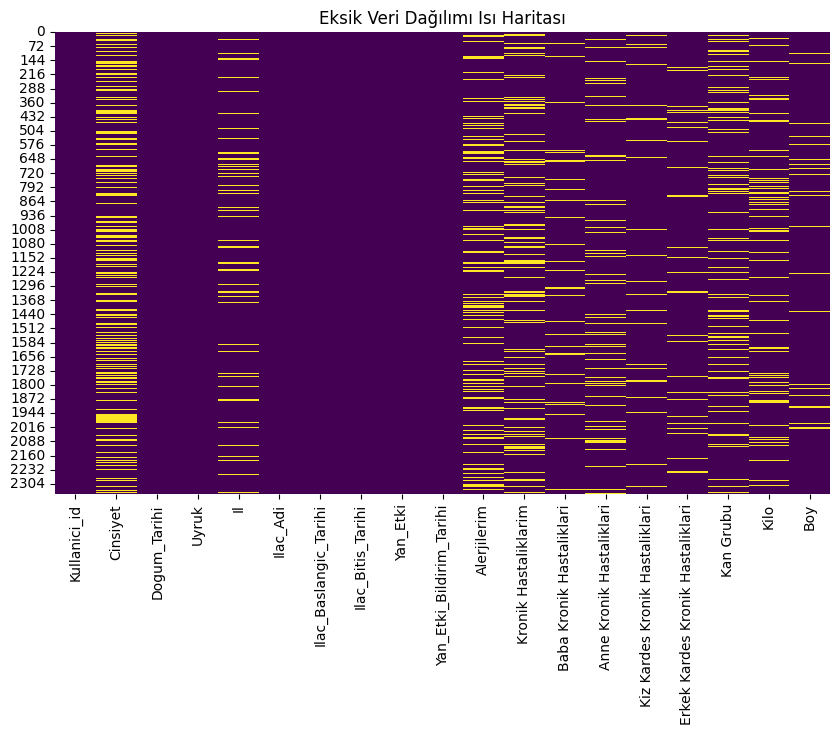

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Veri Dağılımı Isı Haritası')
plt.show()


In [154]:
kat_df = df.select_dtypes(include = ["object"])
kat_df.head()

,Cinsiyet,Uyruk,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu
0,Male,Turkiye,Canakkale,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-
1,Male,Turkiye,Trabzon,fluphenazine hcl,Yorgunluk,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN
2,Female,Turkiye,Canakkale,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-
3,Male,Turkiye,Adana,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-
4,Female,Turkiye,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-


In [155]:
kat_df["Ilac_Adi"].value_counts()

Ilac_Adi
chlordiazepoxide-amitriptyline                             29
lurasidone                                                 27
hydrocortisone cream                                       27
loxapine                                                   26
desvenlafaxine succinate tablet, extended release 24 hr    26
                                                           ..
risperdal consta syringe                                    8
pethidine hcl                                               8
citalopram                                                  8
desoximetasone ointment                                     8
lithium carbonate                                           7
Name: count, Length: 151, dtype: int64

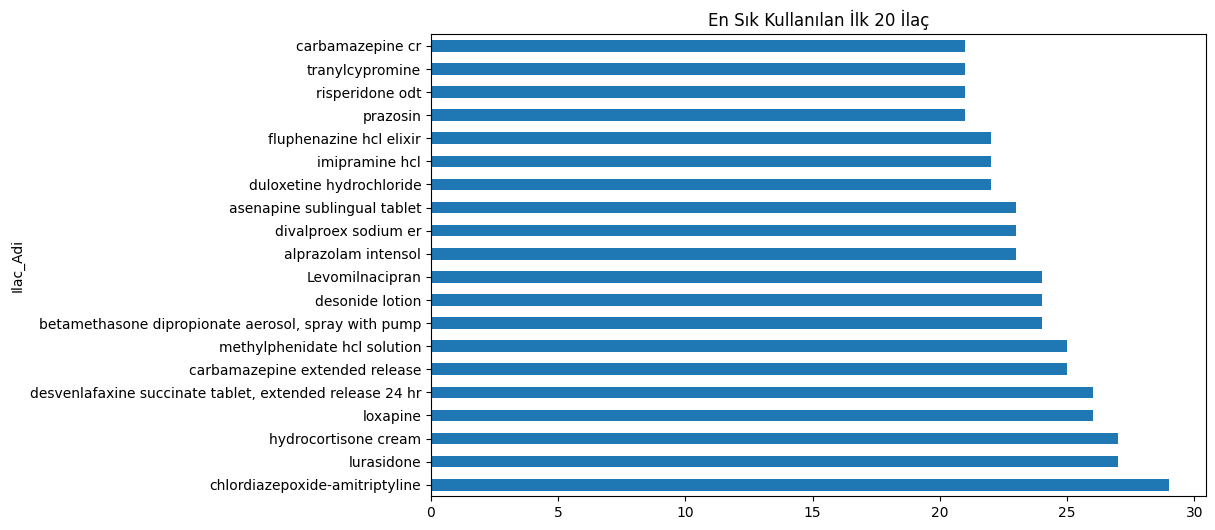

In [156]:
df["Ilac_Adi"].value_counts().nlargest(20).plot(kind='barh', figsize=(10, 6));

plt.title("En Sık Kullanılan İlk 20 İlaç")
plt.show()

In [157]:
kat_df["Yan_Etki"].value_counts()

Yan_Etki
Agizda Farkli Bir Tat    229
Tansiyon Yukselme        227
Yorgunluk                204
Gormede Bulaniklik       170
Kabizlik                 156
Ishal                    145
Az Uyuma                 141
Terleme                   97
Sinirlilik                81
Gec Bosalma               81
Gucsuzluk                 81
Mide Bulantisi            80
Tansiyon Dusuklugu        74
Carpinti                  72
Istah Artisi              71
Bas Agrisi                71
Karin Agrisi              69
Uykululuk Hali            68
Bulanti                   64
Huzursuzluk               63
Kas Agrisi                58
Deride Morarma            55
Name: count, dtype: int64

In [158]:
from pandas.api.types import CategoricalDtype

In [159]:
df.Yan_Etki = df.Yan_Etki.astype(CategoricalDtype(ordered = True))

In [160]:
df.Yan_Etki.head(1)

0    Kabizlik
Name: Yan_Etki, dtype: category
Categories (22, object): ['Agizda Farkli Bir Tat' < 'Az Uyuma' < 'Bas Agrisi' < 'Bulanti' ... 'Tansiyon Yukselme' < 'Terleme' < 'Uykululuk Hali' < 'Yorgunluk']

In [161]:
yan_etki_kat = ["Agizda Farkli Bir Tat", "Tansiyon Yukselme", "Yorgunluk", "Gormede Bulaniklik", "Kabizlik", "Ishal", "Az Uyuma",
 "Terleme", "Sinirlilik", "Gec Bosalma", "Gucsuzluk", "Mide Bulantisi", "Tansiyon Dusuklugu", "Carpinti", "Istah Artisi",
 "Bas Agrisi", "Karin Agrisi", "Uykululuk Hali", "Bulanti", "Huzursuzluk", "Kas Agrisi", "Deride Morarma"]           

In [162]:
df.Yan_Etki = df.Yan_Etki.astype(CategoricalDtype(categories = yan_etki_kat, ordered = True))

In [163]:
df.Yan_Etki.head(1)

0    Kabizlik
Name: Yan_Etki, dtype: category
Categories (22, object): ['Agizda Farkli Bir Tat' < 'Tansiyon Yukselme' < 'Yorgunluk' < 'Gormede Bulaniklik' ... 'Bulanti' < 'Huzursuzluk' < 'Kas Agrisi' < 'Deride Morarma']

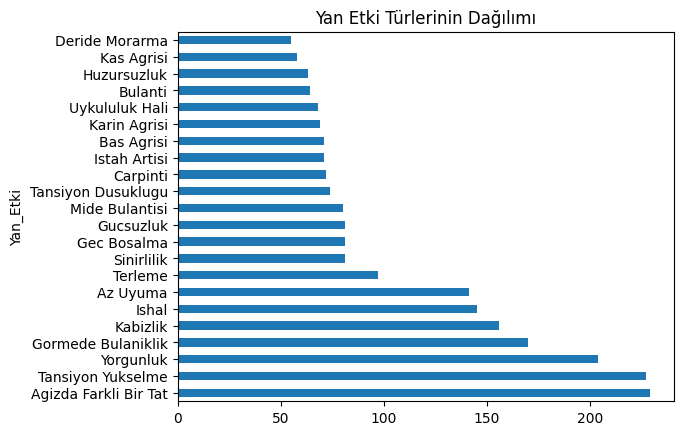

In [164]:
(df["Yan_Etki"]
 .value_counts()
 .plot.barh()
 .set_title("Yan Etki Türlerinin Dağılımı"));

In [165]:
import pandas as pd
side = pd.read_excel("/kaggle/input/side-effect-data-1-xlsx/side_effect_data 1.xlsx")
df = side.copy()

In [166]:
df_num = df.select_dtypes(include = ["float","int64"])
df_num.head()

,Kullanici_id,Kilo,Boy
0,107,103.0,191.0
1,140,81.0,181.0
2,2,93.0,158.0
3,83,NaN,165.0
4,7,99.0,172.0


In [167]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Kullanici_id,2357.0,97.216801,57.017200,1.0,47.0,97.0,146.0,196.0
Kilo,2064.0,80.863857,18.635269,50.0,65.0,83.0,96.0,110.0
Boy,2243.0,174.638431,16.516552,145.0,160.0,176.0,187.0,203.0


In [168]:
df['Ilac_Kullanim_Suresi'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days
print(df.head())

   Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk         Il  \
0           107     Male   1960-03-01  Turkiye  Canakkale   
1           140     Male   1939-10-12  Turkiye    Trabzon   
2             2   Female   1976-12-17  Turkiye  Canakkale   
3            83     Male   1977-06-17  Turkiye      Adana   
4             7   Female   1976-09-03  Turkiye      Izmir   

                         Ilac_Adi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi  \
0                 trifluoperazine            2022-01-09        2022-03-04   
1                fluphenazine hcl            2022-01-09        2022-03-08   
2                 warfarin sodium            2022-01-11        2022-03-12   
3                   valproic acid            2022-01-04        2022-03-12   
4  carbamazepine extended release            2022-01-13        2022-03-06   

                Yan_Etki Yan_Etki_Bildirim_Tarihi Alerjilerim  \
0               Kabizlik      2022-02-19 18:28:43       Ceviz   
1              Yorgunluk      2022-02-03

In [169]:
average_duration = df.groupby('Ilac_Adi')['Ilac_Kullanim_Suresi'].mean().reset_index()

print(average_duration.head(10))

                 Ilac_Adi  Ilac_Kullanim_Suresi
0         Levomilnacipran             64.375000
1      Mometasone furoate             63.636364
2     Prednicarbate cream             58.933333
3              alprazolam             60.888889
4  alprazolam concentrate             61.090909
5           alprazolam er             61.812500
6     alprazolam intensol             62.130435
7          alprazolam odt             61.400000
8       amitriptyline hcl             63.181818
9               amoksapin             62.454545


In [170]:
df['Yan_Etki_Bildirim_Suresi'] = (df['Ilac_Bitis_Tarihi']- df['Yan_Etki_Bildirim_Tarihi']).dt.days

In [171]:
print(df['Ilac_Kullanim_Suresi'].describe())

count    2357.000000
mean       62.234620
std         6.576611
min        47.000000
25%        58.000000
50%        62.000000
75%        67.000000
max        77.000000
Name: Ilac_Kullanim_Suresi, dtype: float64


In [172]:
import pandas as pd
side = pd.read_excel("/kaggle/input/side-effect-data-1-xlsx/side_effect_data 1.xlsx")
df = df.select_dtypes(include = ["float64", "int64"])
df = side.copy()



In [173]:
!pip install missingno

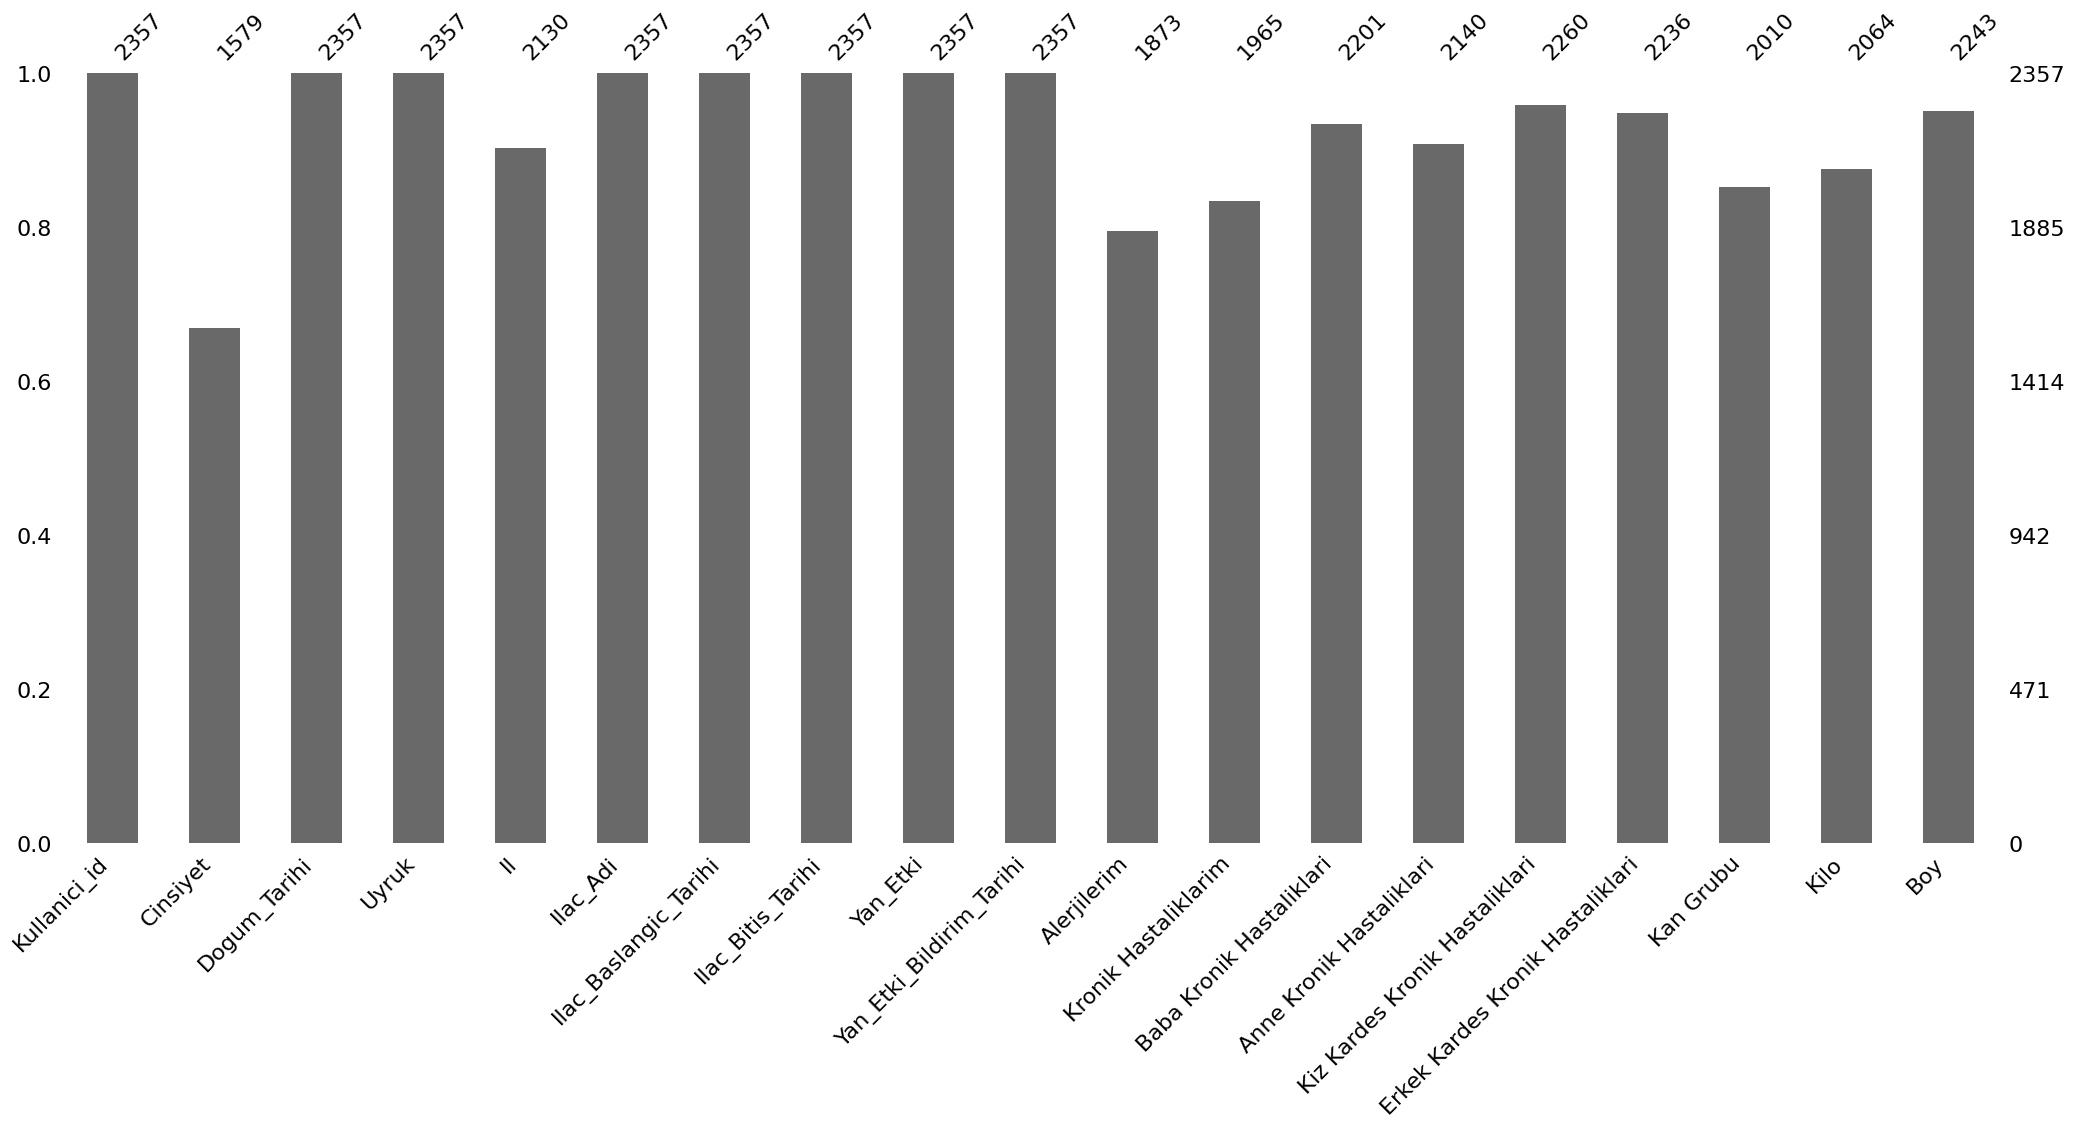

In [174]:
import missingno as msno

msno.bar(df);

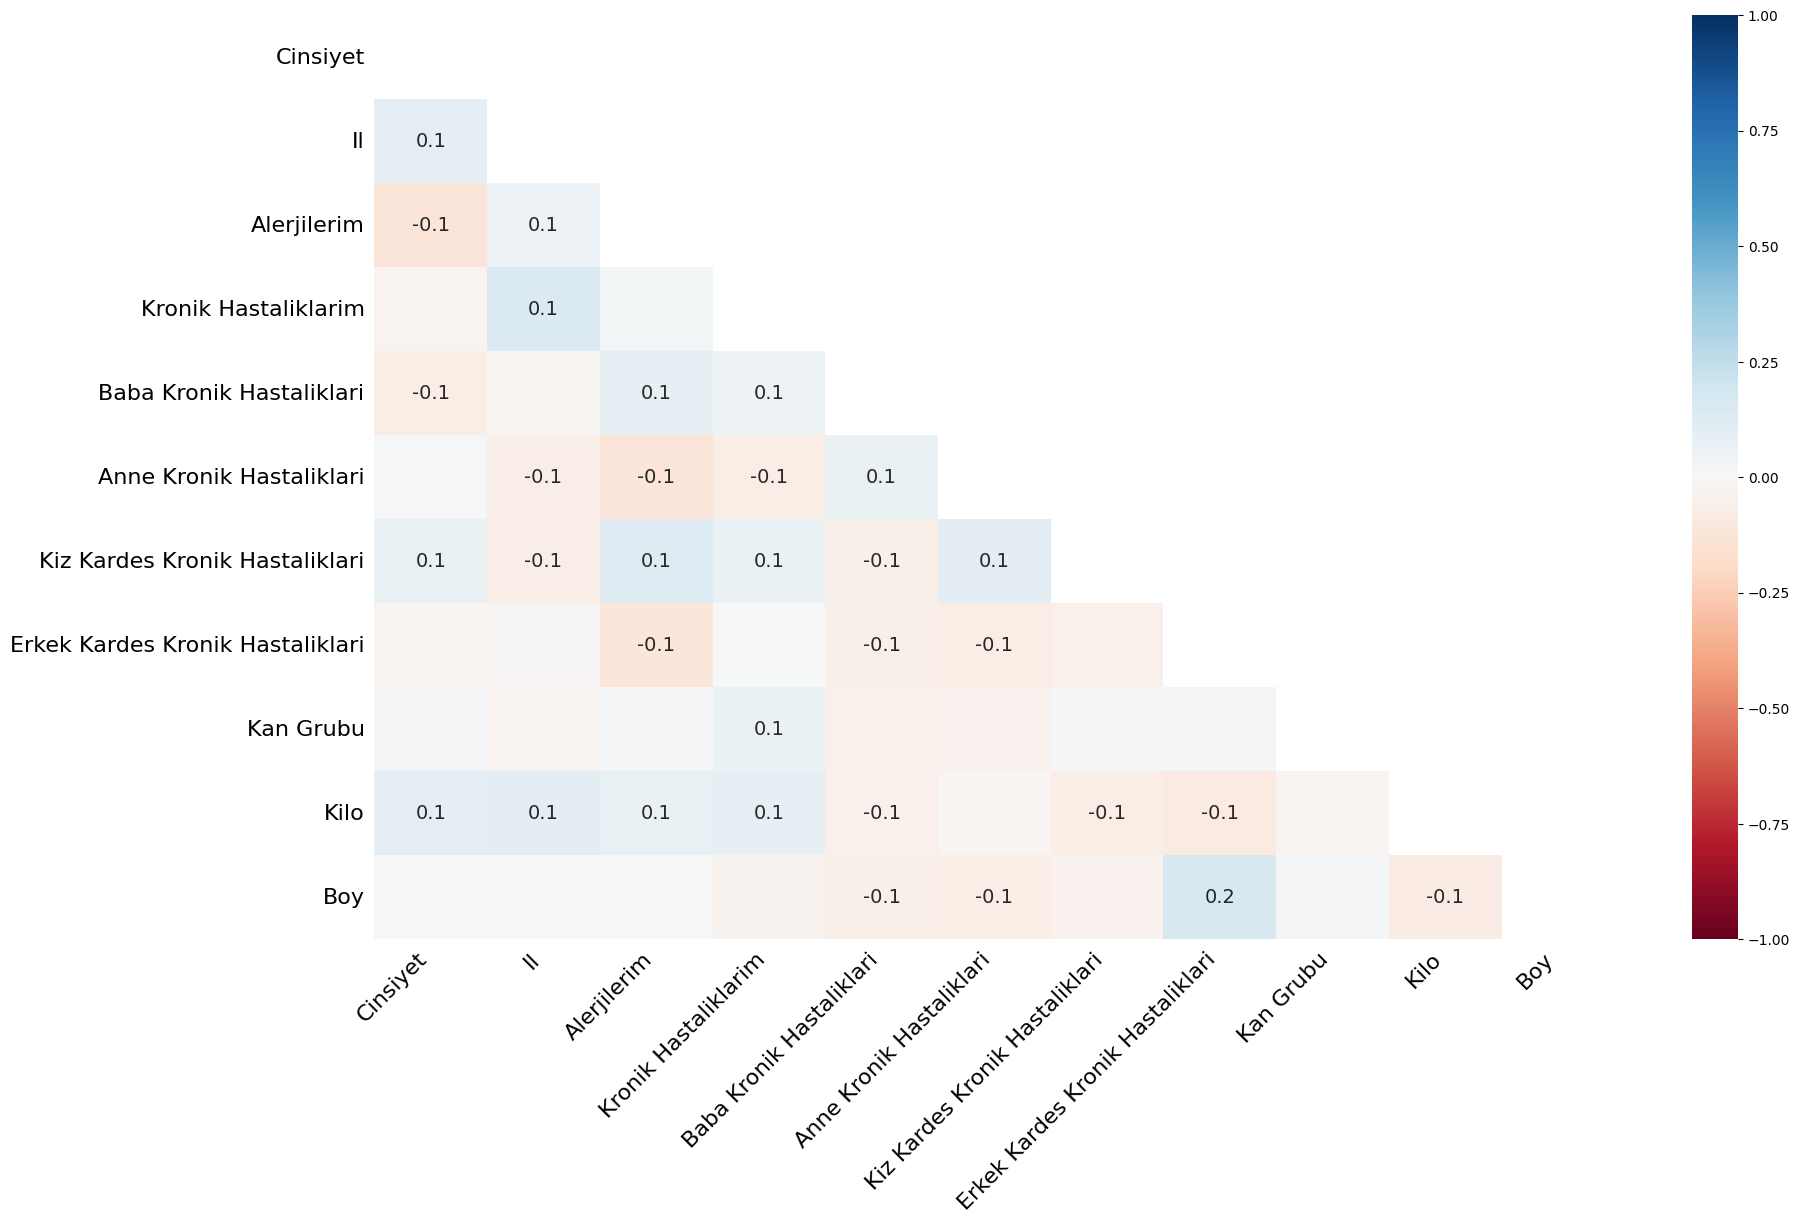

In [175]:
msno.heatmap(df);

In [176]:
!pip install ycimpute

In [177]:
df_encoded = pd.get_dummies(df, columns=['Cinsiyet', 'Uyruk', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim', 'Kronik Hastaliklarim',
                                         'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari',
                                         'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu'])

print(df_encoded)

      Kullanici_id Dogum_Tarihi         Il Ilac_Baslangic_Tarihi  \
0              107   1960-03-01  Canakkale            2022-01-09   
1              140   1939-10-12    Trabzon            2022-01-09   
2                2   1976-12-17  Canakkale            2022-01-11   
3               83   1977-06-17      Adana            2022-01-04   
4                7   1976-09-03      Izmir            2022-01-13   
...            ...          ...        ...                   ...   
2352             9   1957-01-04        NaN            2022-01-13   
2353           101   2004-11-09     Mersin            2022-01-02   
2354           127   1951-11-29     Mersin            2022-01-02   
2355           178   1980-01-30    Kayseri            2022-01-02   
2356           174   1986-11-07   Istanbul            2022-01-06   

     Ilac_Bitis_Tarihi Yan_Etki_Bildirim_Tarihi   Kilo    Boy  \
0           2022-03-04      2022-02-19 18:28:43  103.0  191.0   
1           2022-03-08      2022-02-03 20:48:17   81.

In [178]:
df_encoded = df_encoded.fillna(df_encoded.mode().iloc[0])


In [179]:
df_encoded.shape

(2357, 651)

In [180]:
# Kategorik sütunları belirleyin
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding uygulayın
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)


In [181]:
# Datetime sütunlarını sayısal hale getirme
df_encoded['Dogum_Tarihi'] = df_encoded['Dogum_Tarihi'].astype('int64') // 10**9  # saniye cinsine
df_encoded['Ilac_Baslangic_Tarihi'] = df_encoded['Ilac_Baslangic_Tarihi'].astype('int64') // 10**9
df_encoded['Ilac_Bitis_Tarihi'] = df_encoded['Ilac_Bitis_Tarihi'].astype('int64') // 10**9
df_encoded['Yan_Etki_Bildirim_Tarihi'] = df_encoded['Yan_Etki_Bildirim_Tarihi'].astype('int64') // 10**9


In [182]:
# Tüm boolean sütunlarını sayısal hale getirme
bool_cols = df_encoded.select_dtypes(include=['bool']).columns.tolist()
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [183]:
n_df.shape

(2357, 651)

In [184]:
import pandas as pd
side = pd.read_excel("/kaggle/input/side-effect-data-1-xlsx/side_effect_data 1.xlsx")
df = side.copy()

In [185]:
# Kategorik sütunları one-hot encoding ile dönüştürme
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [186]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
for col in datetime_cols:
    df[col] = df[col].astype('int64') // 10**9  

In [187]:
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

In [188]:
n_df = np.array(df)


In [189]:
knn_imputer = knnimput.KNN(k=4)
df_imputed = knn_imputer.complete(n_df)

Imputing row 1/2357 with 0 missing, elapsed time: 16.445
Imputing row 101/2357 with 0 missing, elapsed time: 16.447
Imputing row 201/2357 with 0 missing, elapsed time: 16.447
Imputing row 301/2357 with 0 missing, elapsed time: 16.448
Imputing row 401/2357 with 0 missing, elapsed time: 16.449
Imputing row 501/2357 with 0 missing, elapsed time: 16.450
Imputing row 601/2357 with 1 missing, elapsed time: 16.451
Imputing row 701/2357 with 0 missing, elapsed time: 16.452
Imputing row 801/2357 with 0 missing, elapsed time: 16.453
Imputing row 901/2357 with 0 missing, elapsed time: 16.453
Imputing row 1001/2357 with 0 missing, elapsed time: 16.454
Imputing row 1101/2357 with 0 missing, elapsed time: 16.455
Imputing row 1201/2357 with 0 missing, elapsed time: 16.456
Imputing row 1301/2357 with 0 missing, elapsed time: 16.457
Imputing row 1401/2357 with 0 missing, elapsed time: 16.458
Imputing row 1501/2357 with 0 missing, elapsed time: 16.458
Imputing row 1601/2357 with 0 missing, elapsed time:

In [190]:
type(df_imputed)

numpy.ndarray